In [1]:
import ROOT
from ROOT import TFile
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy
import pandas as pd 
import time
from os import listdir

import root_pandas
from root_pandas import read_root
from root_pandas import to_root 

Welcome to JupyROOT 6.15/01


In [2]:
hadron_variables = ['P','Theta','Phi','Zh','pid']
event_variables = ['Q2','Nu','TargType']
columns = hadron_variables + event_variables

In [3]:
#this needs to be read in chunks otherwise it uses all memory. (from https://github.com/scikit-hep/root_pandas)
def getdatainChunks(filename,treename):
    dataframe =pd.DataFrame()
    for df in read_root(filename, treename, chunksize=10000,columns=columns,flatten=hadron_variables) :
        #print df.shape[0]
        dataframe = pd.concat([dataframe,df])
    
    #print dataframe.shape[0]
    return dataframe

In [4]:
path = '/mnt/c/Users/marratia/Linux/MC_C/'
thrown = None
accept = None
Files = listdir(path) 
for i , name in enumerate(Files):
    filename = path+name
    #print filename
    accept = pd.concat([ accept , getdatainChunks(filename,'tree_accept')])
    thrown = pd.concat([ thrown , getdatainChunks(filename,'tree_thrown')])

    #if i>20:
    #    break

In [ ]:
#thrown.hist(figsize=(12,12),bins=100)
accept.hist(figsize=(12,12),bins=100)

plt.show()

## Acceptance for positive pions

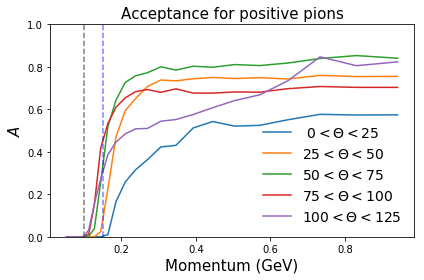

In [26]:
Edges = [0,25,50,75,100,125]
bins = [(x, y) for (x, y) in zip(Edges[:-1], Edges[1:])]
hbins = np.logspace(np.log10(0.05), np.log10(1.0),25)

for j, ibin in enumerate(bins):
    query = 'pid==211 and Theta>%2.2f and Theta<=%2.2f'%(ibin[0],ibin[1])
    num,x = np.histogram(accept.query(query)['P'],range=(0,1.0),bins=hbins)
    den, x = np.histogram(thrown.query(query)['P'],range=(0,1.0),bins=hbins)
    x = (x[:-1] + x[1:])/2.0
    ratio = np.true_divide(num,den)
    label = '%2.0f$<\Theta<$%2.0f'%(ibin[0],ibin[1])
    plt.plot(x,ratio,label=label)

plt.title('Acceptance for positive pions',fontsize=15)
plt.ylabel('$A$',fontsize=15)
plt.xlabel('Momentum (GeV)',fontsize=15)

plt.ylim([0.0,1.0])
plt.axvline(x=0.10,color='black',linestyle='--',alpha=0.5)
plt.axvline(x=0.15,color='blue',linestyle='--',alpha=0.5)
plt.legend(frameon=False,fontsize=14)

plt.tight_layout()
plt.savefig('Acceptance_P_piplus.png')    
plt.show()

## Acceptance for negative pions

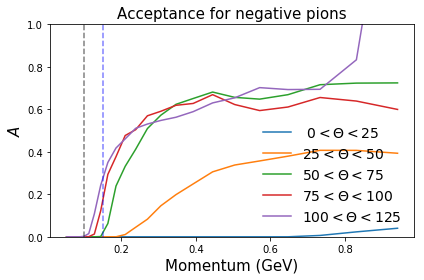

In [27]:
Edges = [0,25,50,75,100,125]
bins = [(x, y) for (x, y) in zip(Edges[:-1], Edges[1:])]

hbins = np.logspace(np.log10(0.05), np.log10(1.0),25)

for j, ibin in enumerate(bins):
    query = 'pid==-211 and Theta>%2.2f and Theta<=%2.2f'%(ibin[0],ibin[1])
    num,x = np.histogram(accept.query(query)['P'],range=(0,1.0),bins=hbins)
    den, x = np.histogram(thrown.query(query)['P'],range=(0,1.0),bins=hbins)
    x = (x[:-1] + x[1:])/2.0
    ratio = np.true_divide(num,den)
    label = '%2.0f$<\Theta<$%2.0f'%(ibin[0],ibin[1])
    plt.plot(x,ratio,label=label)

plt.title('Acceptance for negative pions',fontsize=15)
plt.ylabel('$A$',fontsize=15)
plt.xlabel('Momentum (GeV)',fontsize=15)

plt.ylim([0.0,1.0])
plt.axvline(x=0.10,color='black',linestyle='--',alpha=0.5)
plt.axvline(x=0.15,color='blue',linestyle='--',alpha=0.5)

plt.legend(frameon=False,fontsize=14)
plt.tight_layout()
plt.savefig('Acceptance_P_piminus.png')    
plt.show()

## Acceptance for negative pions, vs z

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


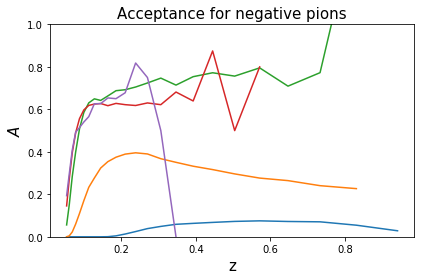

In [28]:
Edges = [0,25,50,75,100,125]
bins = [(x, y) for (x, y) in zip(Edges[:-1], Edges[1:])]

zbins = np.logspace(np.log10(0.05), np.log10(1.0),25)
for j, ibin in enumerate(bins):
    query = 'pid==-211 and Theta>%2.2f and Theta<=%2.2f'%(ibin[0],ibin[1])
    num,x = np.histogram(accept.query(query)['Zh'],range=(0,1.0),bins=zbins)
    den, x = np.histogram(thrown.query(query)['Zh'],range=(0,1.0),bins=zbins)
    x = (x[:-1] + x[1:])/2.0
    ratio = np.true_divide(num,den)
    label = '%2.0f$<\Theta<$%2.0f'%(ibin[0],ibin[1])
    plt.plot(x,ratio,label=label)

plt.title('Acceptance for negative pions',fontsize=15)
plt.ylabel('$A$',fontsize=15)
plt.xlabel('z',fontsize=15)

plt.ylim([0.0,1.0])
plt.tight_layout()
plt.savefig('Acceptance_z_piminus.png')    
plt.show()

## Acceptance as a function of theta for both charges

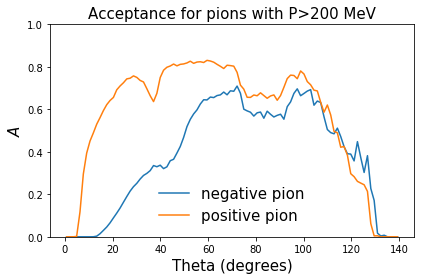

In [29]:
query = 'pid==-211 and P>0.2'
num,x = np.histogram(accept.query(query)['Theta'],range=(0,140),bins=100)
den, x = np.histogram(thrown.query(query)['Theta'],range=(0,140),bins=100)
x = (x[:-1] + x[1:])/2.0
ratio = np.true_divide(num,den)
plt.plot(x,ratio,label='negative pion')

query = 'pid==+211 and P>0.2'
num,x = np.histogram(accept.query(query)['Theta'],range=(0,140),bins=100)
den, x = np.histogram(thrown.query(query)['Theta'],range=(0,140),bins=100)
x = (x[:-1] + x[1:])/2.0
ratio = np.true_divide(num,den)
plt.plot(x,ratio,label='positive pion')

plt.title('Acceptance for pions with P>200 MeV',fontsize=15)
plt.ylabel('$A$',fontsize=15)
plt.xlabel('Theta (degrees)',fontsize=15)
plt.legend(frameon=False,fontsize=15)
plt.ylim([0.0,1.0])
plt.tight_layout()
plt.savefig('Acceptance_Theta_bothpions.png')    
plt.show()

## Show the theta-acceptance for different nu

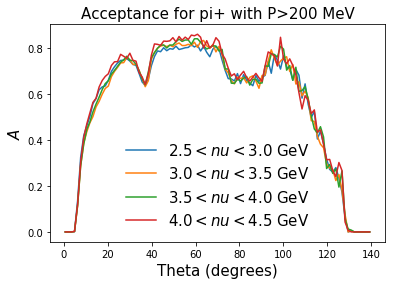

In [46]:
Edges = [2.5,3.0,3.5,4.0,4.5]
bins = [(x, y) for (x, y) in zip(Edges[:-1], Edges[1:])]

for j, ibin in enumerate(bins):
    query = 'pid==+211 and P>0.2 and Nu>%2.2f and Nu<=%2.2f'%(ibin[0],ibin[1])
    num,x = np.histogram(accept.query(query)['Theta'],range=(0,140),bins=100)
    den, x = np.histogram(thrown.query(query)['Theta'],range=(0,140),bins=100)
    label = '%2.1f$<nu<$%2.1f GeV'%(ibin[0],ibin[1])

    x = (x[:-1] + x[1:])/2.0
    ratio = np.true_divide(num,den)
    
    
    plt.plot(x,ratio,label=label)

    
plt.title('Acceptance for pi+ with P>200 MeV',fontsize=15)
plt.ylabel('$A$',fontsize=15)
plt.xlabel('Theta (degrees)',fontsize=15)

plt.legend(frameon=False,fontsize=15)
plt.savefig('Acceptance_Theta_Nudependence.png')    
plt.show()

## Same as above but for Q2 dependence

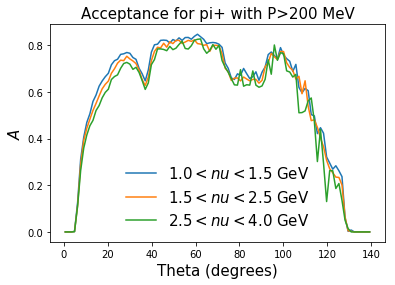

In [58]:
Edges = [1.0,1.5,2.5,4.0]
bins = [(x, y) for (x, y) in zip(Edges[:-1], Edges[1:])]

for j, ibin in enumerate(bins):
    query = 'pid==+211 and P>0.2 and Q2>%2.2f and Q2<=%2.2f'%(ibin[0],ibin[1])
    num,x = np.histogram(accept.query(query)['Theta'],range=(0,140),bins=100)
    den, x = np.histogram(thrown.query(query)['Theta'],range=(0,140),bins=100)
    label = '%2.1f$<nu<$%2.1f GeV'%(ibin[0],ibin[1])

    x = (x[:-1] + x[1:])/2.0
    ratio = np.true_divide(num,den)
    
    
    plt.plot(x,ratio,label=label)

    
plt.title('Acceptance for pi+ with P>200 MeV',fontsize=15)
plt.ylabel('$A$',fontsize=15)
plt.xlabel('Theta (degrees)',fontsize=15)

plt.legend(frameon=False,fontsize=15)
plt.savefig('Acceptance_Theta_Q2dependence.png')    
plt.show()

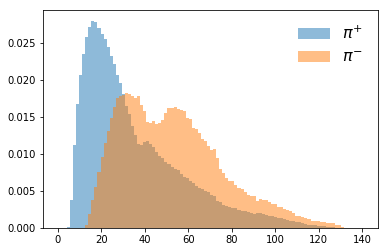

In [11]:
plt.hist(accept.query('pid==211')['Theta'],bins=100,range=(0,140),normed=True,alpha=0.5,label='$\pi^{+}$')
plt.hist(accept.query('pid==-211')['Theta'],bins=100,range=(0,140),normed=True,alpha=0.5,label='$\pi^{-}$')
plt.legend(fontsize=16,frameon=False)
plt.show()

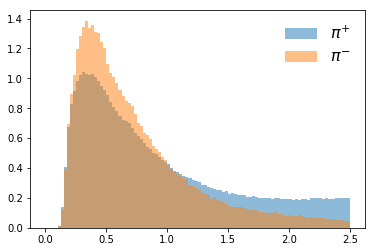

In [12]:
plt.hist(accept.query('pid==211')['P'],bins=100,range=(0,2.5),normed=True,alpha=0.5,label='$\pi^{+}$')
plt.hist(accept.query('pid==-211')['P'],bins=100,range=(0,2.5),normed=True,alpha=0.5,label='$\pi^{-}$')
plt.legend(fontsize=16,frameon=False)
plt.show()

In [ ]:
plt.hist(accept.query('pid==211')['Zh'],bins=100,range=(0,1.0),normed=True,alpha=0.5,label='$\pi^{+}$')
plt.hist(accept.query('pid==-211')['Zh'],bins=100,range=(0,1.0),normed=True,alpha=0.5,label='$\pi^{-}$')
plt.legend(fontsize=16,frameon=False)
plt.show()

## 2D distributions

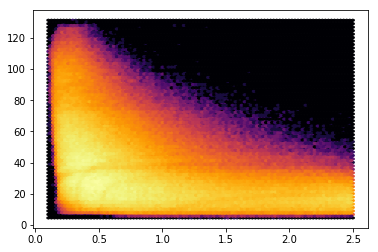

In [16]:
plt.hexbin(accept.query('pid==211 and P<2.5')['P'],accept.query('pid==211 and P<2.5')['Theta'], bins='log',cmap='inferno')


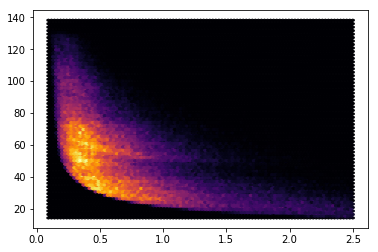

In [20]:
plt.hexbin(accept.query('pid==-211 and P<2.5')['P'],accept.query('pid==-211 and P<2.5')['Theta'],cmap='inferno')


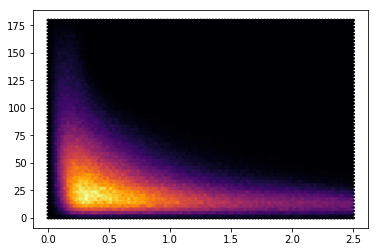

In [19]:
plt.hexbin(thrown.query('pid==-211 and P<2.5')['P'],thrown.query('pid==-211 and P<2.5')['Theta'],cmap='inferno')
